In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
import seaborn as sns
%matplotlib inline
sns.set()
from scipy.stats import pearsonr
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split



In [2]:
dat=pd.read_csv('yield.csv')

## Exploratory Data Analysis

In [3]:
dat.describe()

,Temp,Precipitation,SOM,AWC,Land Area,VPD,Yield(Tonnes/Hectare)
count,71449.000000,71449.000000,71449.000000,71449.000000,7.144900e+04,71449.000000,71449.000000
mean,17.191501,99.146498,2.521281,0.166235,4.904763e+05,9.182233,110.987716
std,3.635811,57.837865,1.722702,0.032307,4.871229e+05,2.268298,38.009641
min,3.676636,0.000000,0.000000,0.060680,4.122758e+04,2.857597,10.000000
25%,14.520791,59.062273,1.396782,0.146691,2.765714e+05,7.585401,84.000000
50%,17.074311,91.317226,1.892984,0.172582,3.731869e+05,8.813497,110.000000
75%,19.755257,130.310869,3.128257,0.193162,5.319360e+05,10.479185,137.300000
max,29.488654,597.273067,14.000000,0.233335,6.325916e+06,20.213063,264.100000


In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71449 entries, 0 to 71448
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temp                   71449 non-null  float64
 1   Precipitation          71449 non-null  float64
 2   SOM                    71449 non-null  float64
 3   AWC                    71449 non-null  float64
 4   Land Area              71449 non-null  float64
 5   VPD                    71449 non-null  float64
 6   Yield(Tonnes/Hectare)  71449 non-null  float64
dtypes: float64(7)
memory usage: 3.8 MB


In [5]:
dat.head()

,Temp,Precipitation,SOM,AWC,Land Area,VPD,Yield(Tonnes/Hectare)
0,20.094990,58.196000,1.246915,0.148338,436036.480,10.490231,30.0
1,20.089992,66.334063,1.464472,0.145533,424346.048,10.957824,30.9
2,20.460485,77.305455,1.477992,0.142567,623394.944,10.875867,49.0
3,19.560460,54.228760,1.386158,0.155162,571869.760,10.147539,55.2
4,20.237434,73.198760,1.345140,0.152290,583355.968,10.643400,53.2


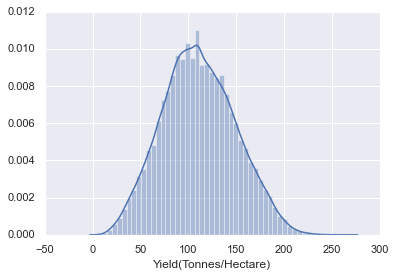

In [6]:
sns.distplot(dat['Yield(Tonnes/Hectare)'])

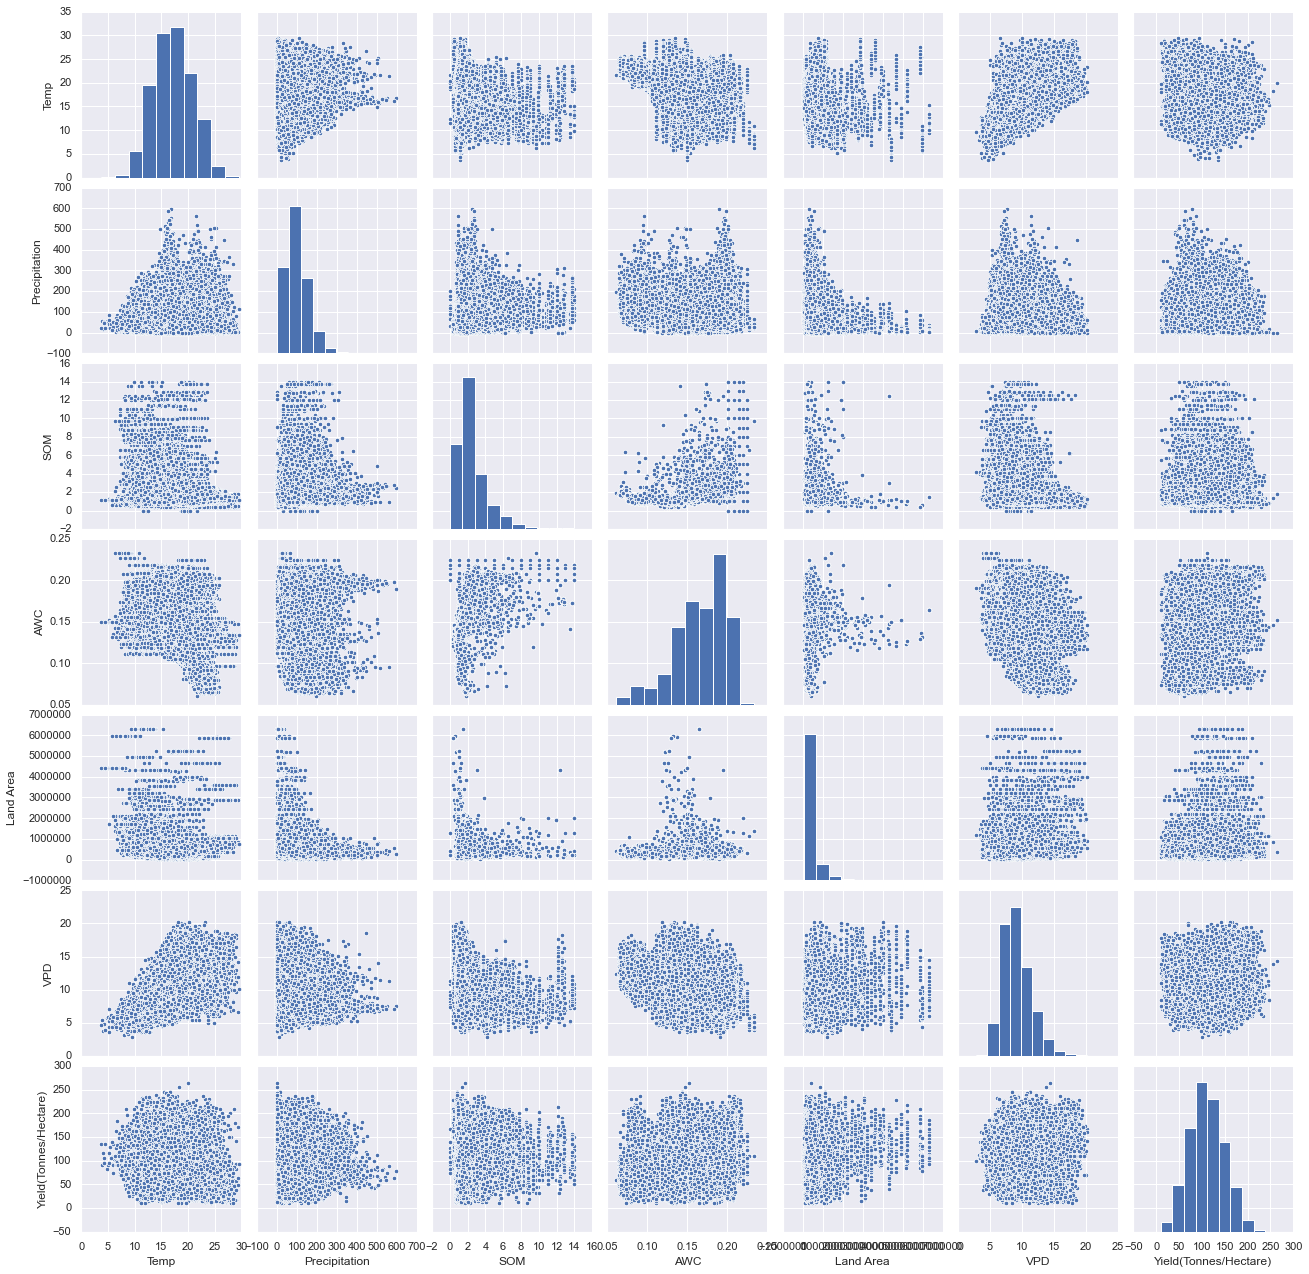

In [7]:
sns.pairplot(dat)

Correlation between features


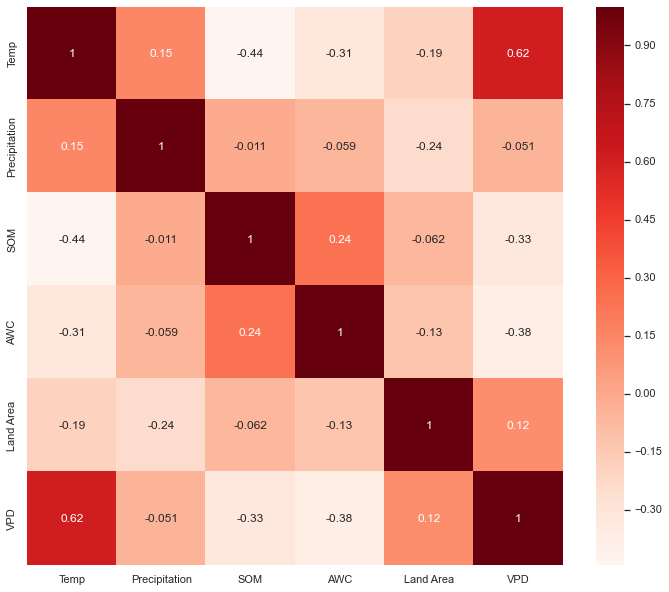

In [8]:
print("Correlation between features")
plt.figure(figsize=(12,10))
cor = dat.drop('Yield(Tonnes/Hectare)',axis=1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


## Machine Learning model selection 
### Creiteria - MSE(Mean Squared Error)

## Yield Prediction

In [9]:
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale data 
scaler.fit(dat.drop(['Yield(Tonnes/Hectare)'],axis=1))
scaled_features = scaler.transform(dat.drop(['Yield(Tonnes/Hectare)'],axis=1))

In [10]:
df_feat = pd.DataFrame(scaled_features,columns=dat.columns[:-1])
df_feat.head()

,Temp,Precipitation,SOM,AWC,Land Area,VPD
0,0.798587,-0.708027,-0.739753,-0.553980,-0.111759,0.576647
1,0.797212,-0.567322,-0.613464,-0.640780,-0.135758,0.782791
2,0.899114,-0.377628,-0.605616,-0.732602,0.272867,0.746659
3,0.651567,-0.776620,-0.658925,-0.342747,0.167091,0.425567
4,0.837765,-0.448632,-0.682735,-0.431648,0.190671,0.644173


In [11]:
X = df_feat
y = dat['Yield(Tonnes/Hectare)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## KNN

Text(0, 0.5, 'Error Rate')

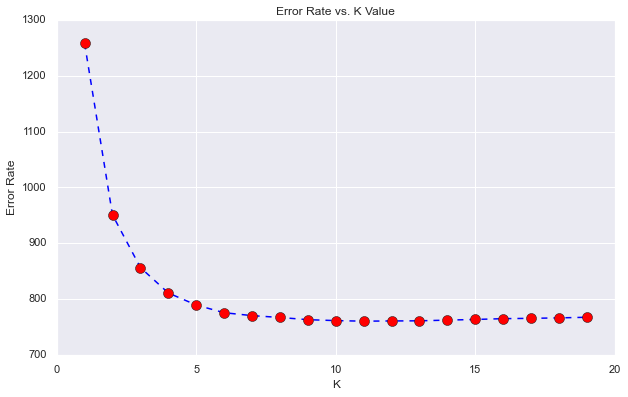

In [12]:
error_rate = []
from sklearn import metrics


# Will take some time
for i in range(1,20):
    
    knn = KNeighborsRegressor(n_neighbors=i,metric='euclidean')
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(metrics.mean_squared_error(pred_i,y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [13]:

knn = KNeighborsRegressor(n_neighbors=10,metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


Correlation b/w Predicted value and test value =  0.6848467831584311


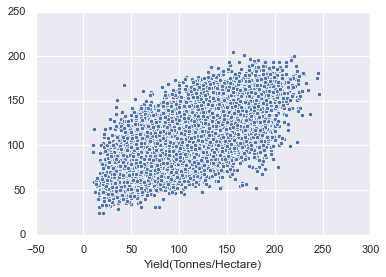

In [14]:
sns.scatterplot(x=y_test,y=y_pred)
cor,_=pearsonr(y_test,y_pred)
print("Correlation b/w Predicted value and test value = ",cor)

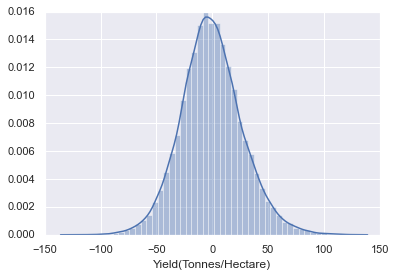

In [15]:
sns.distplot((y_test-y_pred),bins=50);

Model Evaluation

In [16]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Coefficient of determination (R2 score) =", round(metrics.r2_score(y_test, y_pred), 2))
print("Accuracy(Based on MAE)= ", (((110.987716-metrics.mean_absolute_error(y_test, y_pred))/110.987716)*100),"%")

MAE: 21.468777233496617
MSE: 761.2677649078611
RMSE: 27.591081256591977
Coefficient of determination (R2 score) = 0.47
Accuracy(Based on MAE)=  80.65661858155852 %


# SVM

In [17]:
from sklearn.svm import SVR

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,10,500],  
              'gamma': [ 0.003, 0.03,0.3,1],
              'kernel': ['rbf']}  

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 4,cv=2,scoring='neg_mean_squared_error'
) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] C=0.1, gamma=0.003, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=0.1, gamma=0.003, kernel=rbf, score=-1364.694, total= 1.2min
[CV] C=0.1, gamma=0.003, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV] .. C=0.1, gamma=0.003, kernel=rbf, score=-1349.947, total= 1.1min
[CV] C=0.1, gamma=0.03, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.3min remaining:    0.0s


[CV] ... C=0.1, gamma=0.03, kernel=rbf, score=-1234.477, total= 1.2min
[CV] C=0.1, gamma=0.03, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.5min remaining:    0.0s


[CV] ... C=0.1, gamma=0.03, kernel=rbf, score=-1218.112, total= 1.1min
[CV] C=0.1, gamma=0.3, kernel=rbf ....................................
[CV] .... C=0.1, gamma=0.3, kernel=rbf, score=-1120.569, total= 1.2min
[CV] C=0.1, gamma=0.3, kernel=rbf ....................................
[CV] .... C=0.1, gamma=0.3, kernel=rbf, score=-1104.788, total= 1.1min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ...... C=0.1, gamma=1, kernel=rbf, score=-1168.970, total= 1.1min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ...... C=0.1, gamma=1, kernel=rbf, score=-1154.231, total= 1.1min
[CV] C=1, gamma=0.003, kernel=rbf ....................................
[CV] .... C=1, gamma=0.003, kernel=rbf, score=-1262.391, total= 1.1min
[CV] C=1, gamma=0.003, kernel=rbf ....................................
[CV] .... C=1, gamma=0.003, kernel=rbf, score=-1244.589, total= 1.2min
[CV] C=1, gamma=0.03, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed: 82.8min finished


GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 500], 'gamma': [0.003, 0.03, 0.3, 1],
                         'kernel': ['rbf']},
             scoring='neg_mean_squared_error', verbose=4)

In [19]:
print(grid.best_params_) 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVR(C=10, gamma=1)


In [20]:
regressor =SVR(C=10, gamma=1)
regressor.fit(X_train,y_train)

# Predicting the Test set results

y_pred_train = regressor.predict(X_train)
y_pred = regressor.predict(X_test)



Correlation b/w Predicted value and test value =  0.6708191699290398


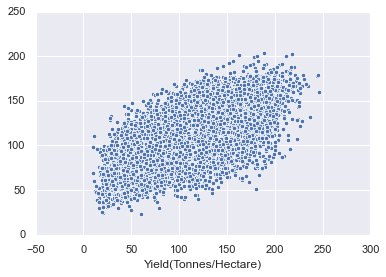

In [21]:
sns.scatterplot(x=y_test,y=y_pred)
cor,_=pearsonr(y_test,y_pred)
print("Correlation b/w Predicted value and test value = ",cor)

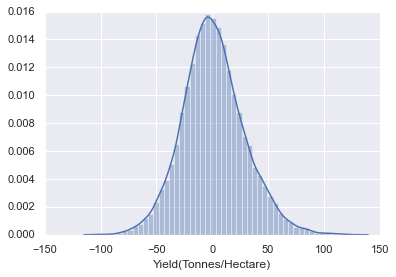

In [22]:
sns.distplot((y_test-y_pred),bins=50);

In [23]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Coefficient of determination (R2 score) =", round(metrics.r2_score(y_test, y_pred), 2))
print("Accuracy(Based on MAE)= ", (((110.987716-metrics.mean_absolute_error(y_test, y_pred))/110.987716)*100),"%")

MAE: 21.783168260926754
MSE: 788.7804574340718
RMSE: 28.08523557732909
Coefficient of determination (R2 score) = 0.45
Accuracy(Based on MAE)=  80.37335207355132 %


# Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor 

In [25]:
rf = RandomForestRegressor(n_estimators=100)
error_rate_test = []
error_rate_train=[]

for iter in range(10):
    rf.fit(X_train, y_train)
    y_train_predicted = rf.predict(X_train)
    y_test_predicted = rf.predict(X_test)
    mse_train = metrics.mean_squared_error(y_train, y_train_predicted)
    mse_test = metrics.mean_squared_error(y_test, y_test_predicted)
    error_rate_train.append( metrics.mean_squared_error(y_train, y_train_predicted))
    error_rate_test.append(metrics.mean_squared_error(y_test, y_test_predicted))
    print("Iteration: {} Train mse: {} Test mse: {}".format(iter, mse_train, mse_test))
    rf.n_estimators += 100

Iteration: 0 Train mse: 93.57603171104094 Test mse: 652.0890107225099
Iteration: 1 Train mse: 91.54440654292297 Test mse: 649.2819322317238
Iteration: 2 Train mse: 90.75130493559129 Test mse: 647.0809515387399
Iteration: 3 Train mse: 90.35269957931521 Test mse: 647.3974616992799
Iteration: 4 Train mse: 90.06496809513169 Test mse: 645.0124439756511
Iteration: 5 Train mse: 90.03627726995491 Test mse: 645.751269275186
Iteration: 6 Train mse: 89.80058626187234 Test mse: 646.3208699765795
Iteration: 7 Train mse: 89.92257067687582 Test mse: 646.4360183092264
Iteration: 8 Train mse: 89.79612751877167 Test mse: 646.4456758876547
Iteration: 9 Train mse: 89.85613097261444 Test mse: 646.8352278237076


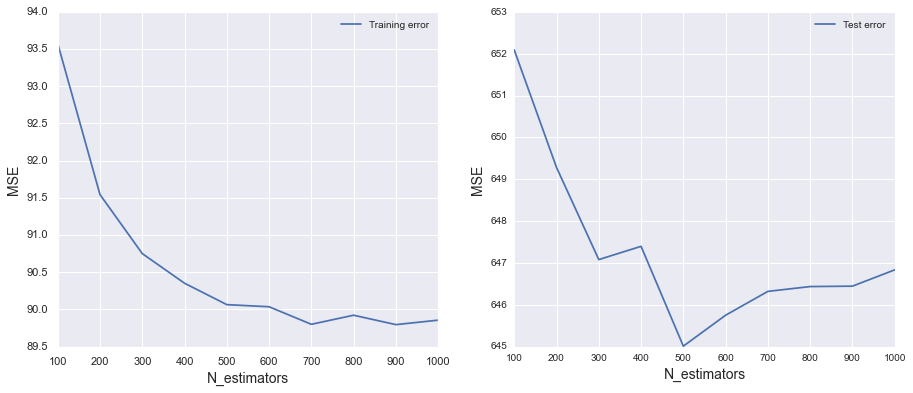

In [26]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)

plt.style.use('seaborn')
plt.plot(range(100,1100,100),error_rate_train, label = 'Training error')
# plt.plot(range(100,1200,100),error_rate_test, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('N_estimators', fontsize = 14)
plt.legend()
plt.subplot(1, 2, 2)

plt.style.use('seaborn')
plt.plot(range(100,1100,100),error_rate_test, label = 'Test error')
# plt.plot(range(100,1200,100),error_rate_test, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('N_estimators', fontsize = 14)
plt.legend()


In [27]:
# create regressor object 
regressor = RandomForestRegressor(n_estimators=900) 
 
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

Correlation b/w Predicted value and test value =  0.7414708962311816


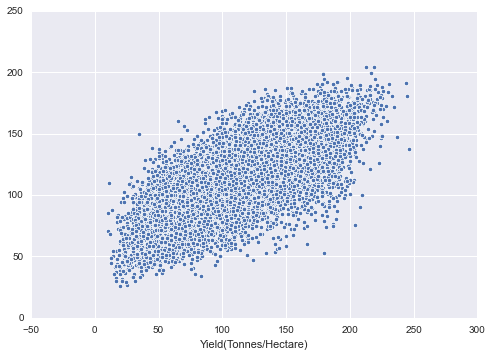

In [28]:
sns.scatterplot(x=y_test,y=y_pred)
cor,_=pearsonr(y_test,y_pred)
print("Correlation b/w Predicted value and test value = ",cor)

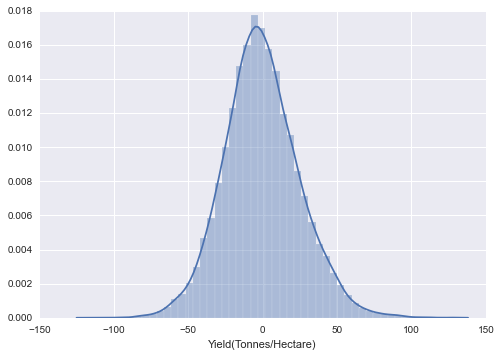

In [29]:
sns.distplot((y_test-y_pred),bins=50);

In [30]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Coefficient of determination (R2 score) =", round(metrics.r2_score(y_test, y_pred), 2))
print("Accuracy(Based on MAE)= ", (((110.987716-metrics.mean_absolute_error(y_test, y_pred))/110.987716)*100),"%")

MAE: 19.840511727963097
MSE: 646.3592578830367
RMSE: 25.423596478134968
Coefficient of determination (R2 score) = 0.55
Accuracy(Based on MAE)=  82.12368679794879 %


## Ferilizer Recommendation

In [31]:
dfs = pd.read_excel('fert.xlsx', )


In [32]:
dfs.head()

,Fertilzers,Yield,Class
0,0–0–0,170,1
1,0–0–0,100,1
2,0–0–0,144,1
3,0–0–0,170,1
4,0–0–0,100,1


In [33]:
dfs.describe()

,Yield,Class
count,56.000000,56.000000
mean,232.178571,5.642857
std,51.897839,2.919705
min,100.000000,1.000000
25%,202.500000,3.000000
50%,229.500000,6.000000
75%,262.750000,8.000000
max,309.000000,10.000000


In [34]:
dfs = dfs.drop('Fertilzers',axis=1)

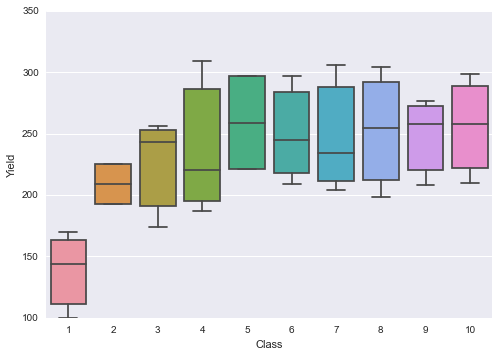

In [35]:
sns.boxplot(data=dfs,y='Yield',x='Class')

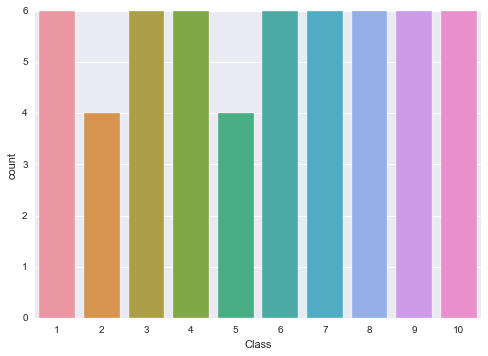

In [36]:
sns.countplot(data=dfs,x='Class')

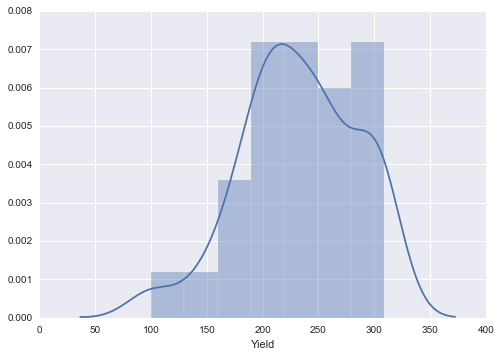

In [37]:
sns.distplot(dfs['Yield'])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(dfs.drop('Class',axis=1), 
                                                    dfs['Class'], test_size=0.15, 
                                                    random_state=101)
from sklearn.neighbors import KNeighborsClassifier

In [39]:
error_rate = []
from sklearn import metrics


# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

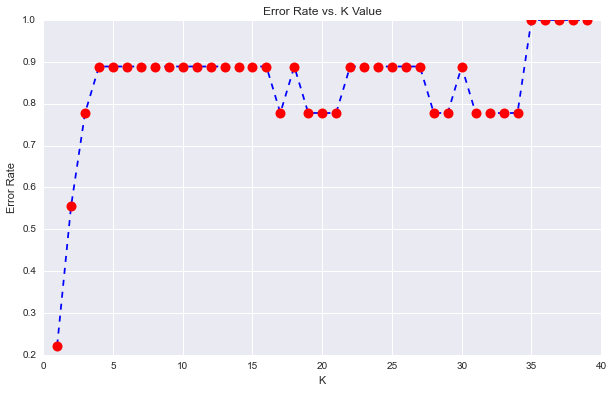

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[1 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         1
          10       0.50      1.00      0.67         1

    accuracy                           0.78         9
   macro avg       0.57      0.71      0.62         9
weighted avg       0.67      0.78      0.70         9



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
